In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


This is a mask verification project done by Akhil S Raj(akhil.s.raj202@gmail.com) I have done with three models mainly - 1)A Flattening of Pixel array and then feeding it to a LogisticRegression object
2) Using Keras the same thing as above
3)Using CNN 

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

In [ ]:
path = '/content/drive/My Drive/dataset'
imagePaths = list(paths.list_images(path))
images = []
labels = []
for imagePath in imagePaths:
	label = imagePath.split(os.path.sep)[-2]
	image = load_img(imagePath, target_size=(224, 224))
	image = img_to_array(image)
	image = preprocess_input(image)
	images.append(image)
	labels.append(label)
images = np.array(images, dtype="float32")
labels = np.array(labels)


In [ ]:
labels.shape

(1110,)

In [ ]:
np.unique(labels)

array(['with_mask', 'without_mask'], dtype='<U12')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


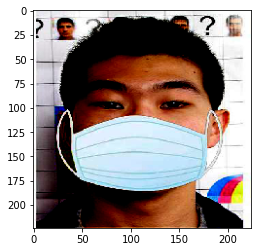

In [ ]:
plt.imshow(images[1])

In [ ]:
train_set_x_flatten = images.reshape(images.shape[0],-1).T 

In [ ]:
le = LabelEncoder()

In [ ]:

labels = le.fit_transform(labels)


In [ ]:
labels

array([0, 0, 0, ..., 1, 1, 1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


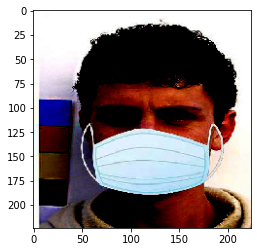

In [ ]:
plt.imshow(train_set_x_flatten[0:,0].reshape(224,224,3))


In [ ]:
X = []
for i in range(1110):
  X.append(train_set_x_flatten[0:,i])


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,labels,test_size=0.3,random_state = 101)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


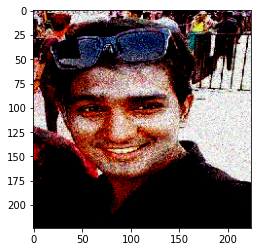

In [ ]:
X_train = (np.array(np.matrix(X_train)))
plt.imshow(X_train[0].reshape(224,224,3))

In [ ]:
X_test = np.array(np.matrix(X_test))

In [ ]:
np.array(np.matrix(X_train)).shape

(777, 150528)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model0 = LogisticRegression()

In [ ]:
model0.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions = model0.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       137
           1       0.95      0.91      0.93       196

    accuracy                           0.92       333
   macro avg       0.91      0.92      0.92       333
weighted avg       0.92      0.92      0.92       333



In [ ]:
X_test = np.array(np.matrix(X_test))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


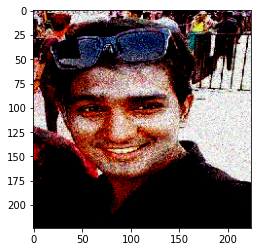

In [ ]:
plt.imshow(X_test[0].reshape(224,224,3))

In [ ]:

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD, RMSprop, adam


Using TensorFlow backend.


In [ ]:
model1 = Sequential() 
model1.add(Dense(2, input_shape=(150528,), activation='softmax'))
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
history = model1.fit(np.array(X_train),np.array(y_train), epochs=50, validation_data=(np.array(X_test),np.array(y_test))) 
score = model1.evaluate(X_test, y_test) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1]) 


Train on 777 samples, validate on 333 samples
Epoch 1/50
777/777 [==============================] - 1s 2ms/step - loss: 5.9102 - accuracy: 0.7735 - val_loss: 5.5992 - val_accuracy: 0.8168
Epoch 2/50
777/777 [==============================] - 1s 1ms/step - loss: 2.6739 - accuracy: 0.9112 - val_loss: 2.5476 - val_accuracy: 0.9279
Epoch 3/50
777/777 [==============================] - 1s 1ms/step - loss: 1.6883 - accuracy: 0.9369 - val_loss: 3.1798 - val_accuracy: 0.9129
Epoch 4/50
777/777 [==============================] - 1s 1ms/step - loss: 1.5748 - accuracy: 0.9421 - val_loss: 2.5267 - val_accuracy: 0.9129
Epoch 5/50
777/777 [==============================] - 1s 1ms/step - loss: 0.6794 - accuracy: 0.9627 - val_loss: 2.2769 - val_accuracy: 0.9039
Epoch 6/50
777/777 [==============================] - 1s 1ms/step - loss: 0.8309 - accuracy: 0.9588 - val_loss: 2.7007 - val_accuracy: 0.9159
Epoch 7/50
777/777 [==============================] - 1s 1ms/step - loss: 0.5435 - accuracy: 0.9653 - 

In [ ]:
model1.predict(X_test)[1]


array([0., 1.], dtype=float32)

In [ ]:
X_test.shape

(333, 150528)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


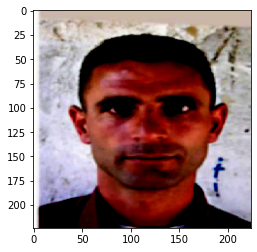

In [ ]:
plt.imshow(X_test[1].reshape(224,224,3))

In [ ]:
model1.predict(X_test)[3]

array([1., 0.], dtype=float32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


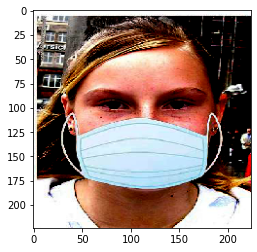

In [ ]:
plt.imshow(X_test[3].reshape(224,224,3))

In [ ]:

from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(100,(3,3),input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))



model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(50,activation='relu'))

model.add(Dense(2,activation='softmax'))


model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
from keras.utils import to_categorical
train_labels = to_categorical(labels)

In [ ]:
train_labels.shape

(1110, 2)

In [ ]:

checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(images[0:1000,],train_labels[0:1000,],epochs=10,callbacks=[checkpoint],validation_split=0.2)

Train on 800 samples, validate on 200 samples
Epoch 1/10
800/800 [==============================] - 176s 220ms/step - loss: 0.0285 - accuracy: 0.9900 - val_loss: 0.1037 - val_accuracy: 0.9600
Epoch 2/10
800/800 [==============================] - 172s 215ms/step - loss: 0.0245 - accuracy: 0.9912 - val_loss: 0.0728 - val_accuracy: 0.9800
Epoch 3/10
800/800 [==============================] - 172s 216ms/step - loss: 0.0212 - accuracy: 0.9937 - val_loss: 0.1218 - val_accuracy: 0.9550
Epoch 4/10
800/800 [==============================] - 172s 215ms/step - loss: 0.0194 - accuracy: 0.9925 - val_loss: 0.0436 - val_accuracy: 0.9850
Epoch 5/10
800/800 [==============================] - 175s 218ms/step - loss: 0.0138 - accuracy: 0.9975 - val_loss: 0.0259 - val_accuracy: 0.9900
Epoch 6/10
800/800 [==============================] - 171s 214ms/step - loss: 0.0069 - accuracy: 0.9962 - val_loss: 0.0278 - val_accuracy: 0.9900
Epoch 7/10
800/800 [==============================] - 172s 215ms/step - loss: 

In [ ]:

print(model.evaluate(images[1000:,],train_labels[1000:]))

110/110 [==============================] - 7s 66ms/step
[0.14722805483774706, 0.9545454382896423]
